# 4-Class-CNN
The faced model did not achieve very good accuracy. I believe I can make a better model with my own CNN. This problem is now a 4-class classification problem where the classes are defined as:
1. Vertical (0)
2. Left (90)
3. Upsidedown (180)
4. Right (270)

This notebook will create a keras CNN to classify the orientation based on an input image

In [2]:
import cv2
import os
import sys
import pdb
import imutils

Remove all .pts files by running this from command prompt

`del /s *.txt`

In [9]:
train_path = '..//data//ibug_300W_large_face_landmark_dataset//helen//train_grey_rotated//'
test_path = '..//data//ibug_300W_large_face_landmark_dataset//helen//test_grey_rotated//'
trainset = os.listdir(train_path)
print(len(trainset))
trainset[:5]


16000


['100032540_1_c1.jpg',
 '100032540_1_c2.jpg',
 '100032540_1_c3.jpg',
 '100032540_1_c4.jpg',
 '100032540_1_mirror_c1.jpg']

In [14]:
cv2.imshow('show', cv2.imread(train_path+trainset[0]))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
cv2.destroyAllWindows()

We now wish to greyscale and rotate the images. 

# Create CNN Model

## Define Functions

In [ ]:
def train(train_folder, test_folder, data_percent, model):
    

In [19]:
from keras.models  import Sequential
from keras import layers
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Activation
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization

from keras.optimizers import Adam, SGD, RMSprop

import matplotlib.pyplot as plt
%matplotlib inline

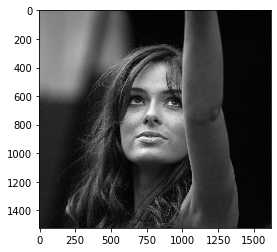

In [26]:
img = cv2.imread(train_path+trainset[0])
plt.imshow(img)

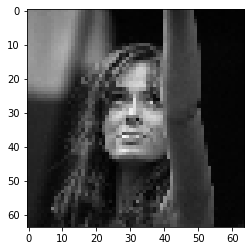

In [30]:
img_128 = cv2.resize(img, (64,64))
plt.imshow(img_128)

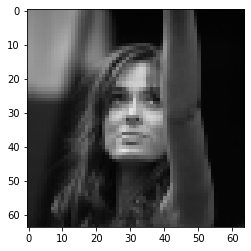

In [31]:
img_128 = cv2.resize(img, (64,64), interpolation = cv2.INTER_AREA)
plt.imshow(img_128)

I tested all the interpolation options from the .resize() method and INTER_AREA looks the best by far. Not sure how this will translate into machine learning though. This is an opportunity for testing. 

### Optimizers

I researched popular structures online and found this one to be popular. It has three iterations of one 'node'. The node comprises a Conv2d -> Conv2d -> MaxPool2D -> dropout. It uses two batchnormalization layers as well to help with training performance. Three of these nodes are successively put together to make the whole model. It performs well after enough training.

In [23]:
model_1 = Sequential([
    Conv2D(32, (3, 3), strides = (1,1), input_shape=(128,128), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(32, (3, 3), strides = (1,1), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    
    Flatten(),
    Dense(4, activation='softmax'),   # number of classes
    Activation('softmax')
])
model_1.summary()

ValueError: Input 0 is incompatible with layer conv2d_9: expected ndim=4, found ndim=3